# The Spike_train Class

This notebook documents the usage of the `Spike_train` class. It covers its main attributes and methods.

A `Spike_train` object can be used to represent the spike train of a single neuron. A spike train is simply a series (1D array) containing the time at which the neuron fired. The time is stored in seconds, usually with time 0 being the start of the recording.

The `Spike_train` class contains method to perform analysis that are often performed on a spike train.


# 1. Create A Spike_train Object

As with any class, you need to create the object by calling its constructor. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from spikeA.Spike_train import Spike_train

# if you don't have spike times
st = Spike_train(name="my_spike_train!",sampling_rate=20000)

# if you have spike times
my_spike_times = np.linspace(0,10,50)
print(my_spike_times)
my_st = Spike_train(name="my_spike_train!",sampling_rate=20000, st=my_spike_times)


[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]
Spike_train, name: my_spike_train!, number of spikes 50, first: 0.0, last: 10.0
Time in intervals: 11.0 sec
1 intervals


# 2. Setting The Spike Train Of A Spike_time Object

If you want to set or change the spike times of a `Spike_time` object, use the method `set_spike_train()`.

This function will set the `st` attribute of the `Spike_time` object.

In [4]:
# set some spike times
st.set_spike_train(np.linspace(0,10,30))
print("Values in st attribute:")
print(st.st)
# set other spike times
st.set_spike_train(np.linspace(0,10,20))
print("Values in st attribute:")
print(st.st)

Spike_train, name: my_spike_train!, number of spikes 30, first: 0.0, last: 10.0
Time in intervals: 11.0 sec
1 intervals
Values in st attribute:
[ 0.          0.34482759  0.68965517  1.03448276  1.37931034  1.72413793
  2.06896552  2.4137931   2.75862069  3.10344828  3.44827586  3.79310345
  4.13793103  4.48275862  4.82758621  5.17241379  5.51724138  5.86206897
  6.20689655  6.55172414  6.89655172  7.24137931  7.5862069   7.93103448
  8.27586207  8.62068966  8.96551724  9.31034483  9.65517241 10.        ]
Spike_train, name: my_spike_train!, number of spikes 20, first: 0.0, last: 10.0
Time in intervals: 11.0 sec
Number of spikes: 20
Values in st attribute:
[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


# 3. Generating A Modulated Poisson Spike Train.

A modulated Poisson spike train, can be generated using the function .generate_poisson_spikes followed by 
arguments (i.e. the values passed to the function.). See the example below.

In [5]:
spike1 = Spike_train(name="no1",sampling_rate=20000)
spike1.generate_modulated_poisson_spike_train(rate_hz=50, sampling_rate=20000, length_sec=2, modulation_hz = 4, modulation_depth = 1,
                                              min_rate_bins_per_cycle=10,phase_shift=0)
spike1.st ##  It is necessary in order to obtain the 1d numpy array with the spike time of one neuron

Spike_train, name: no1, number of spikes 95, first: 0.01215, last: 1.99715
Time in intervals: 2.99715 sec
1 intervals


array([0.01215, 0.01515, 0.0215 , 0.0269 , 0.04745, 0.05365, 0.054  ,
       0.0601 , 0.0961 , 0.10435, 0.10975, 0.1362 , 0.1409 , 0.2576 ,
       0.26665, 0.28815, 0.29775, 0.30405, 0.3076 , 0.32205, 0.33325,
       0.33545, 0.3474 , 0.35245, 0.3706 , 0.51215, 0.54535, 0.58165,
       0.7279 , 0.7375 , 0.75035, 0.7555 , 0.76105, 0.78845, 0.7934 ,
       0.81385, 0.8214 , 0.8298 , 0.83865, 0.85335, 0.85355, 0.8604 ,
       1.00325, 1.03145, 1.0349 , 1.04095, 1.0449 , 1.0489 , 1.05525,
       1.06155, 1.06855, 1.0697 , 1.0922 , 1.1057 , 1.13415, 1.16485,
       1.31735, 1.3575 , 1.3706 , 1.384  , 1.3884 , 1.49675, 1.5113 ,
       1.5145 , 1.5262 , 1.53   , 1.53235, 1.54675, 1.55005, 1.5616 ,
       1.56735, 1.5714 , 1.58195, 1.5821 , 1.5876 , 1.5937 , 1.6089 ,
       1.62055, 1.6224 , 1.6353 , 1.76925, 1.77945, 1.792  , 1.8094 ,
       1.81865, 1.8271 , 1.8421 , 1.8467 , 1.85625, 1.8607 , 1.87425,
       1.8772 , 1.9164 , 1.9875 , 1.99715])

# 4. Poisson Spike Train Scatter Plot

Text(0.5, 0, 'Time (ms)')

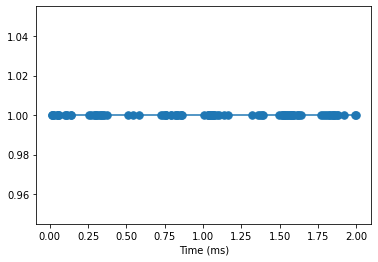

In [6]:
plt.plot(spike1.st,np.ones_like(spike1.st), marker=".", markersize=15) 
plt.xlabel("Time (ms)" )  

# 5. Number Of Spikes And Mean Firing Rate
Return the number of spikes and mean firing rate for a given spike train.

In [7]:
# get the number of spikes
print("Number of spikes:" ,spike1.n_spikes())
# get the mean firing rate
print("Mean firing rate:" ,spike1.mean_firing_rate())

Number of spikes: 95
Mean firing rate: 31.696778606342694


# 6. Instantaneous Firing Rate
Returns the instantaneous firing rate i.e. the firing rate of the neuron over time.

In [8]:
# Here we calculate the firing rate for a neuron
spike1.generate_modulated_poisson_spike_train(rate_hz=50, sampling_rate=20000, length_sec=2,
                                              modulation_hz = 8, modulation_depth = 1,min_rate_bins_per_cycle=10,
                                              phase_shift=0)
spike1.instantaneous_firing_rate(bin_size_ms = 1, sigma = 5)


Spike_train, name: no1, number of spikes 103, first: 0.033, last: 1.99905
Time in intervals: 2.99905 sec
Number of spikes: 103


# 7. Instantaneous Firing Rate Autocorrelation
Determine the distribution of times between any two spikes in a train. It allows the detection of patterns in spike trains, particularly oscillations.

In [9]:
spike1.instantaneous_firing_rate_autocorrelation(normed= False, max_lag_ms= 200)
spike1.ifr_autocorrelation

array([ 2715692. ,  2655876.8,  2607226.2,  2569181.8,  2541063.5,
        2522071.2,  2511287. ,  2507684.5,  2510151. ,  2517527.2,
        2528661.8,  2542481. ,  2558064.5,  2574718.2,  2592037.8,
        2609947.8,  2628715.8,  2648931.5,  2671456.5,  2697343. ,
        2727728. ,  2763720.8,  2806284.5,  2856126.8,  2913616.5,
        2978725. ,  3051005.2,  3129611. ,  3213353.2,  3300790.5,
        3390347.5,  3480445. ,  3569638.5,  3656742. ,  3740937.5,
        3821845.5,  3899564. ,  3974663. ,  4048143. ,  4121352.5,
        4195884. ,  4273449.5,  4355749. ,  4444346.5,  4540556.5,
        4645363.5,  4759361.5,  4882733.5,  5015257. ,  5156340. ,
        5305073.5,  5460295. ,  5620657. ,  5784693. ,  5950878. ,
        6117684.5,  6283639. ,  6447378. ,  6607700. ,  6763625. ,
        6914435.5,  7059698. ,  7199258.5,  7333185. ,  7461671. ,
        7584900. ,  7702873. ,  7815243. ,  7921171. ,  8019241.5,
        8107455. ,  8183321.5,  8244041. ,  8286765. ,  830890

# 8. Instantaneous Firing Rate Autocorrelation Plot

Text(0.5, 0, 'Time msec')

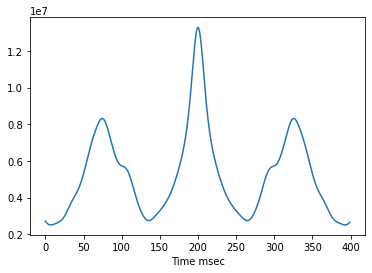

In [10]:
spike1.instantaneous_firing_rate_autocorrelation_plot(timewindow=None)
plt.xlabel("Time msec")


# 9. Instantaneous Firing Rate Power Spectrum
Calculate the power spectrum of the instantaneous firing rate array

In [11]:
spike1.instantaneous_firing_rate_power_spectrum(nfft = None, scaling = "density")
spike1.ifr_power_spectrum

(array([0.00000000e+00, 3.33333333e-01, 6.66666667e-01, ...,
        4.99333333e+02, 4.99666667e+02, 5.00000000e+02]),
 array([1.1148009e-11, 8.8267078e+02, 8.8083728e+02, ..., 1.1523565e-10,
        7.8090034e-10, 9.0356993e-11], dtype=float32))

# 10. Instantaneous Firing Rate Power Spectrum Plot

Text(0, 0.5, 'PSD (s**2/Hz)')

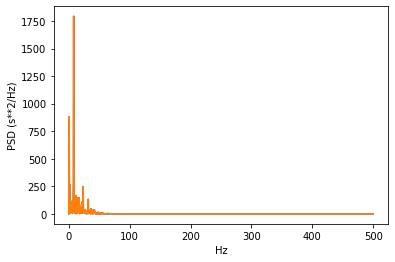

In [12]:
spike1.instantaneous_firing_rate_power_spectrum_plot()
plt.plot(spike1.ifr_power_spectrum[0], spike1.ifr_power_spectrum[1])
plt.xlabel("Hz")
plt.ylabel("PSD (s**2/Hz)")

# 11. Instantaneous Firing Rate Cross-correlation


In [13]:
spike1.instantaneous_firing_rate_crosscorelation(spike2=None,normed= False, max_lag_ms= 200)

Spike_train, name: spike2, number of spikes 10000, first: 0, last: 9999
Time in intervals: 10000 sec
1 intervals
Spike_train, name: spike2, number of spikes 10000, first: 0, last: 9999
Time in intervals: 10000 sec
Number of spikes: 10000


# 12. Calculate The Inter-Spike-Intervals (ISI)


In [14]:
spike1.inter_spike_intervals()
spike1.isi

array([0.0049 , 0.0115 , 0.00105, 0.01225, 0.05575, 0.01545, 0.00875,
       0.0025 , 0.0137 , 0.0026 , 0.0106 , 0.0015 , 0.00715, 0.005  ,
       0.0621 , 0.0107 , 0.0064 , 0.0014 , 0.00595, 0.00205, 0.0095 ,
       0.0208 , 0.0027 , 0.0018 , 0.0024 , 0.05595, 0.01665, 0.0032 ,
       0.00805, 0.00655, 0.0006 , 0.00195, 0.05215, 0.05965, 0.01075,
       0.004  , 0.0138 , 0.00725, 0.0852 , 0.0028 , 0.00365, 0.0095 ,
       0.00485, 0.00445, 0.01315, 0.05285, 0.01725, 0.0315 , 0.0009 ,
       0.0234 , 0.083  , 0.0038 , 0.0063 , 0.006  , 0.00165, 0.00075,
       0.0242 , 0.0702 , 0.02785, 0.03345, 0.01125, 0.0437 , 0.0137 ,
       0.01685, 0.0317 , 0.01235, 0.08665, 0.09665, 0.00385, 0.02075,
       0.0018 , 0.00895, 0.00685, 0.0131 , 0.0008 , 0.06165, 0.0349 ,
       0.0115 , 0.0042 , 0.00855, 0.0033 , 0.01115, 0.05405, 0.0308 ,
       0.0102 , 0.00435, 0.00905, 0.06885, 0.0117 , 0.0224 , 0.00565,
       0.0003 , 0.0034 , 0.00275, 0.04195, 0.00325, 0.0664 , 0.0215 ,
       0.00035, 0.00

# 13 Plot The Inter-Spike-Intervals

array([0.0049 , 0.0115 , 0.00105, 0.01225, 0.05575, 0.01545, 0.00875,
       0.0025 , 0.0137 , 0.0026 , 0.0106 , 0.0015 , 0.00715, 0.005  ,
       0.0621 , 0.0107 , 0.0064 , 0.0014 , 0.00595, 0.00205, 0.0095 ,
       0.0208 , 0.0027 , 0.0018 , 0.0024 , 0.05595, 0.01665, 0.0032 ,
       0.00805, 0.00655, 0.0006 , 0.00195, 0.05215, 0.05965, 0.01075,
       0.004  , 0.0138 , 0.00725, 0.0852 , 0.0028 , 0.00365, 0.0095 ,
       0.00485, 0.00445, 0.01315, 0.05285, 0.01725, 0.0315 , 0.0009 ,
       0.0234 , 0.083  , 0.0038 , 0.0063 , 0.006  , 0.00165, 0.00075,
       0.0242 , 0.0702 , 0.02785, 0.03345, 0.01125, 0.0437 , 0.0137 ,
       0.01685, 0.0317 , 0.01235, 0.08665, 0.09665, 0.00385, 0.02075,
       0.0018 , 0.00895, 0.00685, 0.0131 , 0.0008 , 0.06165, 0.0349 ,
       0.0115 , 0.0042 , 0.00855, 0.0033 , 0.01115, 0.05405, 0.0308 ,
       0.0102 , 0.00435, 0.00905, 0.06885, 0.0117 , 0.0224 , 0.00565,
       0.0003 , 0.0034 , 0.00275, 0.04195, 0.00325, 0.0664 , 0.0215 ,
       0.00035, 0.00

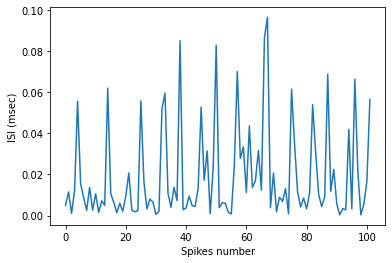

In [15]:
spike1.inter_spike_intervals()
plt.plot(spike1.isi)
plt.xlabel('Spikes number')
plt.ylabel ('ISI (msec)')
spike1.isi

# 14. Inter-Spike-Intervals Histogram Plot
Plot the inter spike interval histogram using matplotlib

Text(0.5, 0, 'ISI msec')

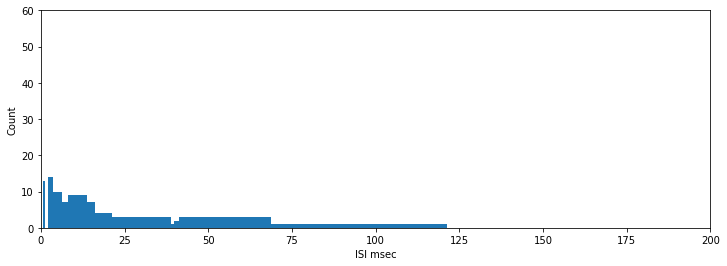

In [16]:
plt.figure(figsize=(12,4)) ## define the size of the figure
spike1.inter_spike_intervals_histogram(bin_size_ms=2,max_time_ms=500, density= False)
spike1.inter_spike_interval_histogram_plot( plot_type = "bar")
plt.xlim(0,200) ## define graph limits on the x axis
plt.ylim(0,60) ## define graph limits on the y axis
plt.xlabel("ISI msec")

## 15. Create A Graph Where Firing Frequency And Modulation Are Superimposed

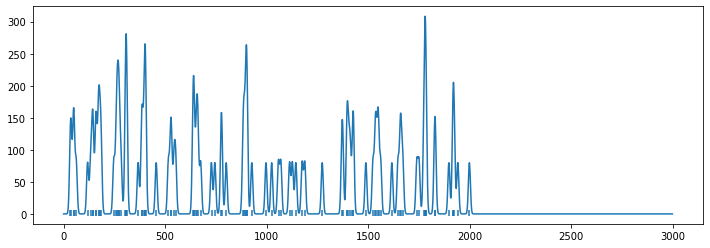

In [17]:
plt.figure(figsize=(12,4))
plt.plot(spike1.ifr[2][:-1],spike1.ifr[0])
plt.scatter(spike1.st*1000,np.ones_like(spike1.st),marker="|")

## 16.Setting Time Intervals To Limit The Analysis To Specific Time Periods

Spike_train, name: no1, number of spikes 510, first: 0.01125, last: 9.83365
Time in intervals: 10.83365 sec
1 intervals
Time in intervals: 10 sec
Number of spikes: 510
Time in intervals: 5 sec
Number of spikes: 252
unset intervals
Time in intervals: 10.83365 sec
Number of spikes: 510
Time in intervals: 2 sec
Number of spikes: 96
Time in intervals: 3 sec
Number of spikes: 133


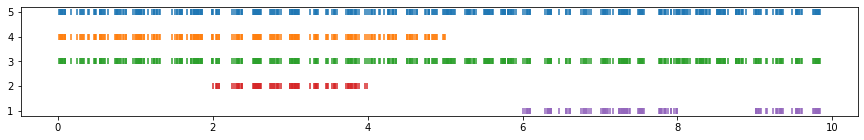

In [47]:
spike1 = Spike_train(name="no1",sampling_rate=20000)
spike1.generate_modulated_poisson_spike_train(rate_hz=50, sampling_rate=20000, 
                                              length_sec=10, modulation_hz = 4, modulation_depth = 1,
                                              min_rate_bins_per_cycle=10,phase_shift=0)

plt.figure(figsize=(15,2))

# intervals 0 to 10
spike1.set_intervals(np.array([[0,10]]))
plt.scatter(spike1.st,np.repeat(5,spike1.st.shape[0]),marker="|")

# intervals 0 to 5
spike1.set_intervals(np.array([[0,5]]))
plt.scatter(spike1.st,np.repeat(4,spike1.st.shape[0]),marker="|")

# unset previous intervals
print("unset intervals")
spike1.unset_intervals()
plt.scatter(spike1.st,np.repeat(3,spike1.st.shape[0]),marker="|")

# intervals from 2 to 4
spike1.set_intervals(np.array([[2,4]]))
plt.scatter(spike1.st,np.repeat(2,spike1.st.shape[0]),marker="|")

# intervals from 6 to 8 and 9 to 10
spike1.set_intervals(np.array([[6,8],[9,10]]))
plt.scatter(spike1.st,np.repeat(1,spike1.st.shape[0]),marker="|")

plt.show()